In [1]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import sys
sys.path.append(".")
sys.path.append("model/")
from getway import getway

test = getway()

Using TensorFlow backend.


model/yolo_weights.h5 model, anchors, and classes loaded.


## Getway - Train and test
    '''
    input
    train_path type filepath and txt format  ->  
    val_path type filepath and txt format -> 
    model_save_name: string
    ----
    train_loss -> save into self.train_loss_list 
    val_loss -> save into self.val_loss_list 
    '''

In [2]:
train_loss, val_loss = test.train_and_test(train_path='/root/data/Tiny_train.txt',val_path='/root/data/Tiny_val.txt',model_save_name='test0412.h5')

num_anchors:  9
Create YOLOv3 model with 9 anchors and 80 classes.
Train on 16 samples, val on 3 samples, with batch size 64.
Epoch 1/2
1/1 [==============================] - 5043s 5043s/step - loss: 826.0729 - val_loss: 2693738261291896886263808.0000
Epoch 2/2
1/1 [==============================] - 28s 28s/step - loss: 1050.0352 - val_loss: 1259194082656256.0000
Unfreeze all of the layers.
Train on 16 samples, val on 3 samples, with batch size 32.
Epoch 2/4
1/1 [==============================] - 4889s 4889s/step - loss: 781.8279 - val_loss: 847879.6250
Epoch 3/4
1/1 [==============================] - 13s 13s/step - loss: 708.7836 - val_loss: 249538.7188
Epoch 4/4
1/1 [==============================] - 13s 13s/step - loss: 654.0036 - val_loss: 2635.9666


## Getway - Plot loss
        '''
        plot train and test loss
        '''

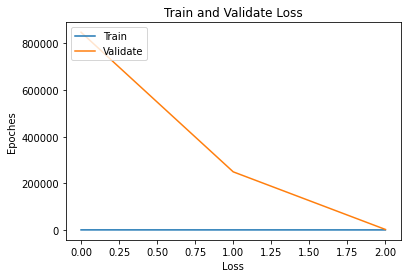

In [3]:
test.plot_loss()

## Getway - predict
        '''
        input
            image_data 4D array image_datas type numpy 4 D array  [n, L, W, RGB]
        output
            [boxes.numpy(), scores.numpy(), classes.numpy()]
        '''

In [4]:
pred_model = getway(config_file='config.ini')
pred_model.load_model(weight_path='/root/project/API/model_data/yolo_weights.h5')
pred_model.model.inputs

model/yolo_weights.h5 model, anchors, and classes loaded.
/root/project/API/model_data/yolo_weights.h5 model, anchors, and classes loaded.


[<tf.Tensor 'input_6:0' shape=(?, ?, ?, 3) dtype=float32>]

In [6]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
img = load_img('/root/project/keras-yolo3/VOCdevkit/VOC2007/JPEGImages/000012.jpg', target_size=(416,416))
img_array = img_to_array(img)
img_4d = img_array.reshape(-1,img_array.shape[0],img_array.shape[1],img_array.shape[2])
pred_box = pred_model.batch_predict(img_4d)
pred_box[0][0].tolist()

Found 2 boxes for img


[[38.51521301269531, 38.27674865722656, 102.75370788574219, 87.65928649902344],
 [38.21806335449219, 36.97289276123047, 101.96058654785156, 88.33173370361328]]

In [22]:
text_file = open("model/coco_classes.txt", "r")
classes = text_file.read().splitlines()
from PIL import Image as Img
from PIL import Image, ImageDraw, ImageFont
import numpy as np
def display_image_from_result(im_path, bbox, score, label):
    """Display image within server's response.

    Args:
        response (requests.models.Response): The response from the server after object detection.
    """
    print(len(bbox))
    for i in range(len(bbox)):
        print(str(classes[label[i]-1]) + '_' +  f"{score[i]*100:.2f}" + '%')
        im = Img.open(im_path, mode='r')
        draw = ImageDraw.Draw(im)
        font = ImageFont.truetype(font='/root/project/fast/Gemelli.ttf',size=np.floor(1.5e-2 * np.shape(img)[1]+15).astype('int32'))        
        text = str(classes[label[i]-1]) + '_' +  f"{score[i]*100:.2f}" + '%'
        label_size = draw.textsize(text,font)
        text_origin = np.array([bbox[i][0],bbox[i][1]-label_size[1]])
        draw.rectangle([bbox[i][0],bbox[i][1],bbox[i][2],bbox[i][3]],outline='red', width=2)
        draw.text(text_origin, str(text),fill=(255,0,0),font=font)
        im.show()

2
bicycle_61.21%


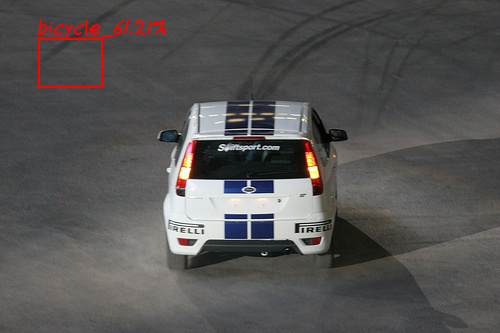

train_67.51%


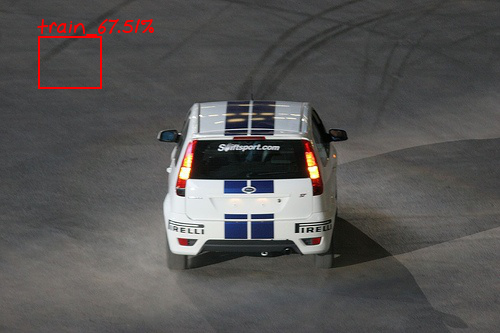

In [23]:
display_image_from_result('/root/project/keras-yolo3/VOCdevkit/VOC2007/JPEGImages/000012.jpg', pred_box[0][0],  pred_box[0][1],pred_box[0][2])

In [12]:
pred_box[0][0]

array([[ 38.515213,  38.27675 , 102.75371 ,  87.65929 ],
       [ 38.218063,  36.972893, 101.96059 ,  88.33173 ]], dtype=float32)

test.train_loss_list=[3250.75732421875, 3011.520263671875, 2829.818359375, 2594.710205078125,1352.123,1122.82357,985.11145,771.1169,381.9456182,175.468105]
test.test_loss_list=[57940424.0, 5137840.0, 422057.78125, 26866.70703125,12814.99458,11584.18567,8917.248652,8866.187,8128.82719,7744.484125648]
